# Problem Statement 

"Traditional farming leads to soil damage and resource waste due to improper crop selection. This project develops a Sustainable AI model to recommend the most suitable crop based on specific soil nutrients and climate data. The goal is to maximize agricultural yield while minimizing the need for chemical fertilizers and water."

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
df = pd.read_csv('Crop_recommendation.csv')

# 2. Basic Information (Add these to Slide 2 of your PPT)
print(df.info())      # Shows data types (float/int)
print(df.describe())  # Shows Mean, Min, Max (The "stats")
print(df.head())      # Shows the first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates (Teacher's extra step for quality)
print(f"Duplicate rows: {df.duplicated().sum()}")

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64
Duplicate rows: 0


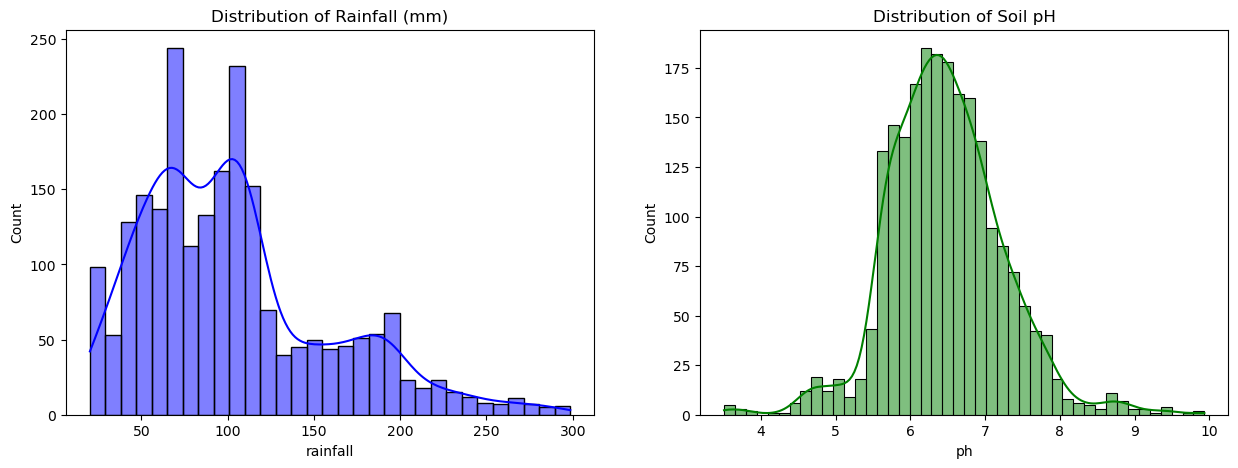

In [4]:
# Distribution of Rainfall and pH
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['rainfall'], kde=True, color='blue')
plt.title('Distribution of Rainfall (mm)')

plt.subplot(1, 2, 2)
sns.histplot(df['ph'], kde=True, color='green')
plt.title('Distribution of Soil pH')

plt.show()

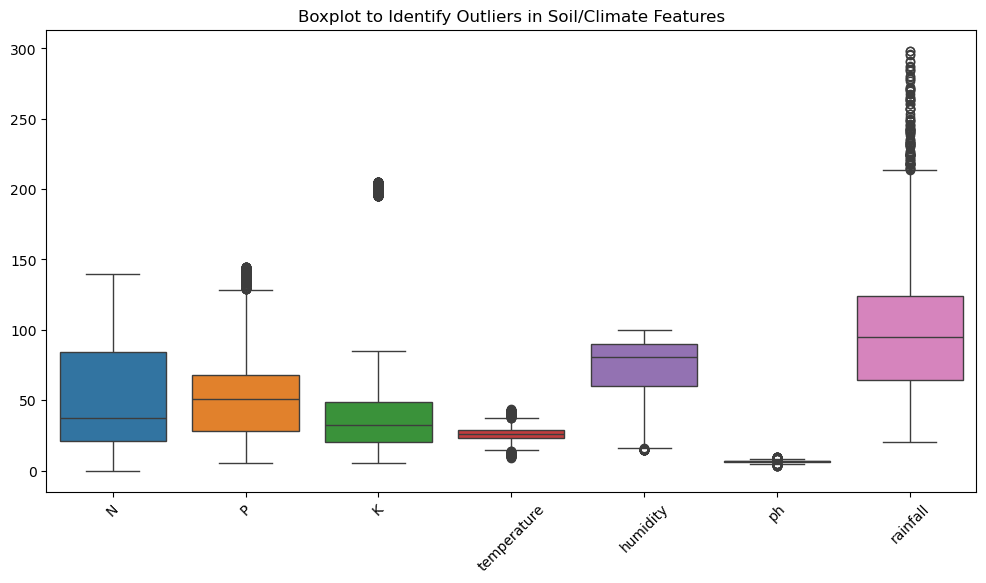

Data size after removing outliers: (1768, 8)


In [5]:
# Identify outliers using Boxplots
Features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[Features])
plt.title("Boxplot to Identify Outliers in Soil/Climate Features")
plt.xticks(rotation=45)
plt.show()

# (Optional) Remove outliers like the teacher did:
Q1 = df[Features].quantile(0.25)
Q3 = df[Features].quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df[Features] < (Q1 - 1.5 * IQR)) | (df[Features] > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Data size after removing outliers: {df_clean.shape}")

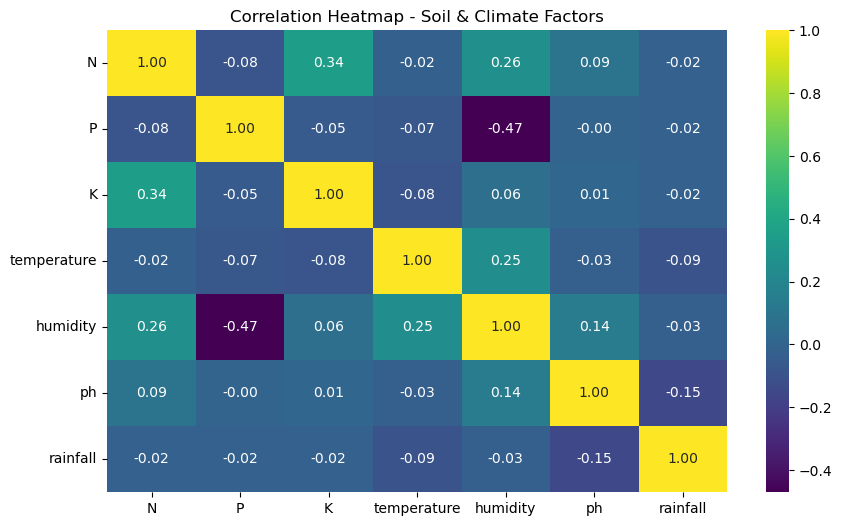

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap - Soil & Climate Factors")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split data
X = df_clean.drop('label', axis=1)
y = df_clean['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest (The most accurate model for this dataset)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Results for Slide 5
y_pred = model.predict(X_test)
print(f"Final Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(classification_report(y_test, y_pred))

Final Accuracy: 98.59%
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        21
   blackgram       0.96      1.00      0.98        23
    chickpea       1.00      1.00      1.00        10
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        18
      cotton       0.95      1.00      0.97        18
        jute       0.84      1.00      0.91        16
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        18
       maize       1.00      0.95      0.97        19
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      0.93      0.96        14
    mungbean       1.00      1.00      1.00        18
   muskmelon       1.00      1.00      1.00        18
      orange       1.00      1.00      1.00        14
      papaya       1.00      1.00      1.00        13
  pigeonpeas       1.00      1.00      1.00        23
 pom

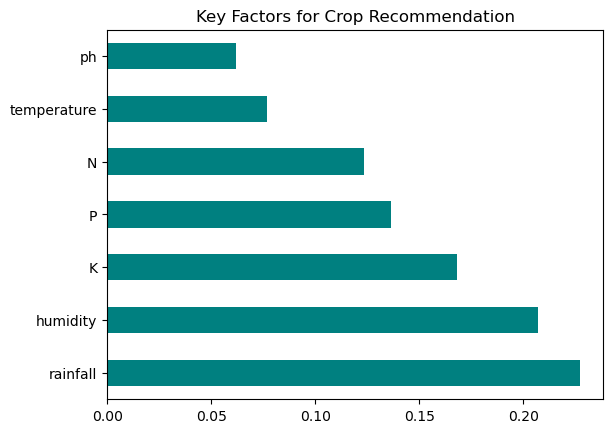

In [8]:
# See what the AI thinks is most important
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(7).plot(kind='barh', color='teal')
plt.title("Key Factors for Crop Recommendation")
plt.show()

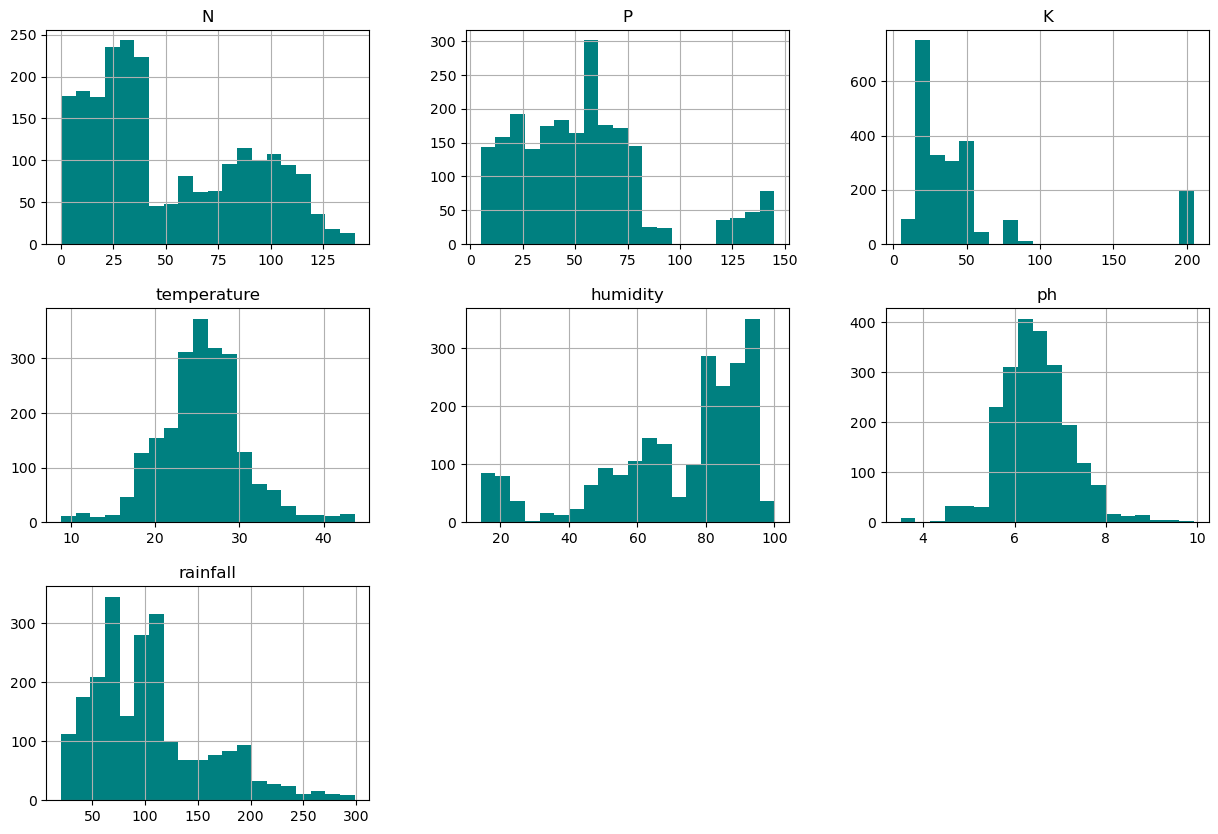

In [9]:
df.hist(bins=20, figsize=(15,10), color='teal')
plt.show()